<a href="https://colab.research.google.com/github/aguscura/Python-Deep-Learning/blob/main/Red_Neuronal_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Entrenamiento (Train)
#Prueba (Test)
#Validación

In [ ]:
import tensorflow as tf

In [ ]:
#Precarga de datos, la base MNIST viene por defecto en Keras.
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

' cmap: Colormap.\n    Default: rcParams["image.cmap"] (default: \'viridis\')\n    The Colormap instance or registered colormap name used to map scalar data to colors. This parameter is ignored for RGB(A) data.\n                                                                                                                                    '

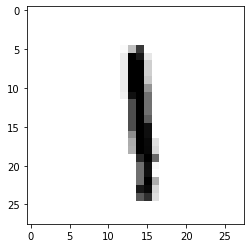

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(x_train[8], cmap=plt.cm.binary)

""" cmap: Colormap.
    Default: rcParams["image.cmap"] (default: 'viridis')
    The Colormap instance or registered colormap name used to map scalar data to colors. This parameter is ignored for RGB(A) data.
                                                                                                                                    """

In [ ]:
y_train[8]

1

In [ ]:
#Dimensiones del tensor x_train
print(x_train.ndim)

#Forma del tensor x_train
print(x_train.shape)

#Tipo de datos del tensor x_train
print(x_train.dtype)

""" x_train es un tensor 3D de enteros de 8bits. 
    Concretamente, es un VECTOR de 60 mil matrices 2D de 28x28 enteros. 
    Cada una de esas matrices es una imagen en escala de grises con coeficientes entre 0 y 255."""

3
(60000, 28, 28)
uint8


' x_train es un tensor 3D de enteros de 8bits. \n    Concretamente, es un VECTOR de 60 mil matrices 2D de 28x28 enteros. \n    Cada una de esas matrices es una imagen en escala de grises con coeficientes entre 0 y 255.'

**IMPORTANTE** (Página 101).
En este ejemplo estamos tratando un ejemplo en blanco y negro, pero en general una imagen en color suele tener 3 dimensiones. Altura, anchura y profundidad de color. Las imágenes en escala de grises (como los digitos MNIST) tienen un solo canal de color y, por lo tanto, pueden almacenarse en tensores 2D CADA UNA DE ELLAS. Pero habitualmente los tensores de las imágenes son 3D. (O sea, cada imagen individualmente es un tensor 3D). 

Por ejemplo, 64 imágenes en escala de grises de tamaño 128x128 podrían almacenarse en un tensor de la forma (64, 128, 128, 1). En cambio, un conjunto de 64 imágenes en color de tamaño 128x128 podría almacenarse en un tensor de la forma (64, 128, 128, 3). Esos 3 canales son para el uso de la codificacion RGB. En ambos casos hablamos de un tensor 4D con la forma (samples, height, width, channels).

Repaso: Cada imágen podemos generalizarla como un tensor 3D. Es decir, un cubo.
Ese cubo tendrá 128x128 (alto y ancho) y 3 de espesor. Cada una de esas 3 matrices, representa las intensidades en Red, Green y Blue.
Encima, tenemos 64 cubos por lo que finalmente terminamos teniendo un vector de 64 cubos.
Para escala de grises, tenemos un solo canal de color, entonces no tenemos cubos. En su lugar tenemos matrices directamente como el ejemplo inicial. 

Nota: Cualquier conjunto de datos se puede representar como un tensor. Por ejemplo un video es una secuencia de fotos (fotogramas, frames). Podemos representarlo en un tensor 5D: (samples, frames, height, width, channels).

In [ ]:
#Manipular un tensor: Vamos a crear un mini tensor con las primeras 100 imagenes del anterior que contenía 60 mil.

first_100 = x_train[0:100,:,:]
print(first_100.shape)

#EQUIVALENTE!!!
first_100_bis = x_train[0:100, 0:28, 0:28]
print(first_100_bis.shape)

(100, 28, 28)
(100, 28, 28)


In [ ]:
#Ahora, en vez de recortar la cantidad de imagenes, recorto los pixeles. 
#Tomo esquina INFERIOR DERECHA

inferior_derecha = x_train[:, 14:, 14:]
print(inferior_derecha.shape)

(60000, 14, 14)


In [ ]:
x_test[11].shape

(28, 28)

In [ ]:
#Idem anterior, pero cortando la PARTE CENTRAL de la imagen. Usando indices relativos:
#Nota, el recorte también es de 14x14 pixeles en este caso.

centro_imagenes = x_train[:, 7:-7, 7:-7]
centro_imagenes.shape

(60000, 14, 14)

# PREPROCESAMIENTO

El objetivo del preprocesamiento de datos es adaptar los mismos a un formato que permita un mejor aprovechamiento por parte de las redes neuronales.
Los ejemplos más comunes para imagenes y redes neuronales son:
**VECTORIZACION,
NORMALIZACION,
EXTRACCION DE CARACTERISTICAS**

In [ ]:
#NORMALIZACION - Las matrices de 28x28 contienen numeros que van del 0 al 255 de tipo Uint8. Conviene normalizarlos a float32 en el rango de 0 a 1. 
# Esto se hace dividiendo toda la matriz por 255. 


# 1ro cambio de tipo
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

""" Este tipo de normalizacion se hace para facilitar que converja el proceso de entrenamiento. Porque, en general, para alimentar una red no se usan datos con valores que sean mucho mas grandes
que los valores de los pesos de la red """

' Este tipo de normalizacion se hace para facilitar que converja el proceso de entrenamiento. Porque, en general, para alimentar una red no se usan datos con valores que sean mucho mas grandes\nque los valores de los pesos de la red '

In [ ]:
# CAMBIO DE FORMA (RESHAPE)
""" Cambiar la forma de los tensores sin cambiar los datos. Para facilitar la entrada de los datos a la red neuronal, se transforma el tensor de una imagen 2D (matriz de 28x28) a un vector de 1D. 
Es decir, la matriz de 28x28 numeros se puede representar como un vector de 784 numeros (concatenando fila a fila). Este es el formato de entrada que acepta la red neuronal densamente conectada.
"""

#En el siguiente ejemplo, la primera dimension indexa la imagen y la segunda dimension indexa el píxel en cada imagen.
x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000,784)

print(x_train.shape)
print(x_test.shape)


(60000, 784)
(10000, 784)


In [ ]:
# Ahora vamos a trabajar con el vector de las labels. El vector y. 
# Hacemos un one hot encoding. Para cada imagen, el vector de salida va a tener 10 posiciones. 9 van a ser ceros. El 1 estará en la etiqueta correcta.

from tensorflow.keras.utils import to_categorical

#Valor antes de aplicar la transformación para la primer imagen:
print(y_train[0])
print(y_test[0])

print(y_train.shape)
print(y_test.shape)

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)


5
7
(60000,)
(10000,)


In [ ]:
y_train.shape

(60000, 10)

In [ ]:
#Valor despues de aplicar la transformacion para la primer imagen
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

**LISTO, YA TENEMOS LOS DATOS EN EL FORMATO QUE NECESITAMOS PARA USARLOS EN NUESTRO MODELO.**

In [ ]:
# Creación del modelo básico usando 'Sequential'. Esta clase permite la creación de una red neuronal básica

from tensorflow.keras import layers
from keras.layers import Activation, Dense
from keras.models import Sequential

model = Sequential()
model.add(Dense(10, activation='sigmoid', input_shape=(784,)))
model.add(Dense(10,activation='softmax'))

#Parámetros de las capas Dense --> Ver documentación
#Un parámetro importante puede ser los valores de INICIO de los PESOS (W). Los podemos inicializar con un cierto valor para que el problema converja rápido.

""" En este caso, la red neuronal se ha definido como una secuencia de dos capas densas que están COMPLETAMENTE CONECTADAS (todas las neuronas de la primera capa están conectadas con las de
la siguiente capa). 
    El input_shape indica explicitamente cómo son los datos de entrada: un tensor que indica que tenemos 784 features. Cada pixel de una imagen es una caracteristica.
"""

' En este caso, la red neuronal se ha definido como una secuencia de dos capas densas que están COMPLETAMENTE CONECTADAS (todas las neuronas de la primera capa están conectadas con las de\nla siguiente capa). \n    El input_shape indica explicitamente cómo son los datos de entrada: un tensor que indica que tenemos 784 features. Cada pixel de una imagen es una caracteristica.\n'

**EN GENERAL, LA CAPA DE SALIDA DE UNA RED DE CLASIFICACION TENDRA TANTAS NEURONAS COMO CLASES. MENOS EN UNA CLASIFICACION BINARIA EN DONDE SOLO SE NECESITARÁ UNA NEURONA**

In [ ]:
# UTIL: Para ver la forma de un modelo

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 10)                7850      
                                                                 
 dense_3 (Dense)             (None, 10)                110       
                                                                 
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


**Loss Function** (Funcion de coste) --> Sirve para evaluar el error entre las salidas calculadas y las salidas deseadas de los datos de entrenamiento. Ejemplo: categorical_crossentropy

** Optimizador ** Manera que tenemos de ir mejorando y reduciendo el error (loss function) para acercar los pesos (w) al optimo.

** Métrica ** Qué metrica buscamos optimizar? Ejemplo Accuracy (precisión): Fracción de las imágenes que son correctamente clasificadas.

In [ ]:
model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=['accuracy'])

**epochs** --> Cantidad de veces que usaremos todos los datos en el proceso de aprendizaje.

In [ ]:
#Entrenamiento propiamente dicho
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 1.9009 - accuracy: 0.5098
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 1.3073 - accuracy: 0.6953
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.9849 - accuracy: 0.7765
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.8007 - accuracy: 0.8174
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6842 - accuracy: 0.8429


In [ ]:
#Evaluamos el modelo. "evaluate() devuelve 2 parametros: loss y accuracy"

validate_loss, validate_acc = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.6252 - accuracy: 0.8607


In [ ]:
#Accuracy = Precisión. Qué porcentaje de los datos clasifica correctamente. En este caso el 87% de los registros del set de testeo fueron clasificados correctamente. 
#Accuracy = Predicciones correctas/ Total de las predicciones

print("Accuracy", validate_acc)

Accuracy 0.8607000112533569


In [ ]:
#Recall = Indica cómo de bien el modelo evita los falsos negativos. Los falsos negativos son MUY importantes. Podría ser trágico si decis que una imagen no es melanoma y efectivamente lo era.
#Recall = Se calcula sobre todos los true_positives. Es decir (melanomas predichos correctamente / todos los melanomas )
#Recall = VP / (VP + FN)

""" La conveniencia de usar una métrica u otra dependerá de cada caso en particular y del COSTE asociado a cada error de clasificacion del modelo """ 

' La conveniencia de usar una métrica u otra dependerá de cada caso en particular y del COSTE asociado a cada error de clasificacion del modelo '

(28, 28)


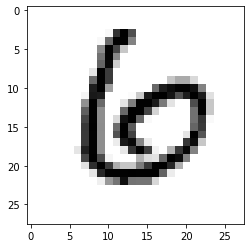

In [ ]:
#Ahora vamos a realizar una predicción sobre una imagen determinada usando el modelo ya entrenado
#Imagen que vamos a utilizar:


#Pude hacer el reshape de todo el array de imágenes. No de la imágen individual.
#Le hacemos reshape a 28x28 para ver la imagen con imshow.

x_test_original = x_test.reshape(10000,28,28)
print(x_test_original[11].shape)

plt.imshow(x_test_original[11], cmap=plt.cm.binary)

In [ ]:
#Predicciones
import numpy as np

predictions = model.predict(x_test)
print(predictions[11]) # Probabilidades para la imagen 11.
print(np.argmax(predictions[11])) #Indice de la posición que contiene el valor más alto.
print(np.sum(predictions[11])) #Suma de todas las probabilidades. Debe ser igual a 1

[0.04782686 0.01966085 0.11770047 0.05761197 0.02621655 0.07210248
 0.54781944 0.00195621 0.10050131 0.00860388]
6
1.0000001
